In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
class Metrics:
    # rectangle: [y1, x1, y2, x2] (y1 <= y2, x1 <= x2)
    def iou(self, r1, r2):
        oy = max(0, min(r1[2], r2[2]) - max(r1[0], r2[0]))
        ox = max(0, min(r1[3], r2[3]) - max(r1[1], r2[1]))

        R1 = (r1[2] - r1[0]) * (r1[3] - r1[1])
        R2 = (r2[2] - r2[0]) * (r2[3] - r2[1])
        Rol = oy * ox
        return abs(Rol) / abs(R1 + R2 - Rol)

In [53]:
class MachineLearning:
    def __init__(self, seed=0):
        self.metrics = Metrics()
        np.random.seed(seed)
        
    def load_image(self, img_path):
        self.img = cv2.imread(img_path)
        assert len(self.img.shape) == 3, "invalid image dimension."
        self.H, self.W, self.C = self.img.shape
        
    def random_cropping(self, gt, samples=200, hsize=60, wsize=60):
        assert 0 < hsize <= self.H, "hsize value is invalid"
        assert 0 < wsize <= self.W, "wsize value is invalid"
        
        rectangles = np.zeros((samples, 4), dtype=np.float32)
        labels = np.zeros((samples), dtype=np.uint8)
        for i in range(samples):
            w = np.random.randint(self.W - wsize)
            h = np.random.randint(self.H - hsize)
            rectangles[i] = np.array((h, w, h+hsize, w+wsize))
            labels[i] = int(self.metrics.iou(gt, rectangles[i]) >= 0.5) * 2
        return rectangles, labels
        
    def add_rectangles(self, rectangles, labels, gt=None):
        output_img = self.img.copy()
        colors = [
            (255, 0, 0),  # blue : not close
            (0, 255, 0),  # green: ground truth
            (0, 0, 255,)  # red  : close
        ]
        for rect, label in zip(rectangles, labels):
            y1, x1, y2, x2 = rect.astype(np.int)
            c = colors[label]
            output_img = cv2.rectangle(output_img, (x1, y1), (x2, y2), c)
        if gt is not None:
            y1, x1, y2, x2 = gt.astype(np.int)
            c = colors[1]
            output_img = cv2.rectangle(output_img, (x1, y1), (x2, y2), c)
        return output_img

In [54]:
class Solver:
    def __init__(self, seed=0):
        self.ml = MachineLearning()
    
    def problem_94(self, img_path):
        self.ml.load_image(img_path)
        gt = np.array([41, 47, 103, 129], dtype=np.float32)
        rects, labels = self.ml.random_cropping(gt, samples=200, hsize=60, wsize=60)
        output_img = self.ml.add_rectangles(rects, labels, gt)
        plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        plt.show()

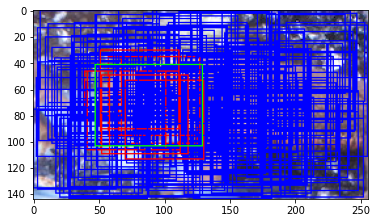

In [55]:
solver = Solver()
solver.problem_94("../imori_1.jpg")